### HW Part 3:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
sample_size = 100

groupA = np.random.normal(10, 10, sample_size)
groupB = np.random.normal(70, 10, sample_size)
groupC = np.random.normal(40, 10, sample_size)

category = ['GroupA']*sample_size + ['GroupB']*sample_size + ['GroupC']*sample_size

df = pd.DataFrame({'value': np.concatenate([groupA, groupB, groupC]),
                   'category': category})

In [3]:
# groups
groupA = df[df['category']=='GroupA']['value']
groupB = df[df['category']=='GroupB']['value']
groupC = df[df['category']=='GroupC']['value']

# Perform a paired t-test
F_statistic, p_value = stats.f_oneway(groupA, groupB, groupC)

# Get means
mean_groupA = groupA.mean()
mean_groupB = groupB.mean()
mean_groupC = groupC.mean()

# Print the results
print("T-statistic:", F_statistic)
print("P-value:", p_value)
print("Mean groupA:", mean_groupA)
print("Mean groupB:", mean_groupB)
print("Mean groupC:", mean_groupC)

T-statistic: 964.8740228553092
P-value: 1.1889877180351414e-130
Mean groupA: 9.402140541943574
Mean groupB: 69.49927848961852
Mean groupC: 39.414898213844005


In [4]:
# round them in order to make the chart more readable at the end
F_statistic = round(F_statistic,2)
p_value = round(p_value,5) # more decimal since it's a lower value in general
mean_groupA = round(mean_groupA,2)
mean_groupB = round(mean_groupB,2)
mean_groupC = round(mean_groupC,2)

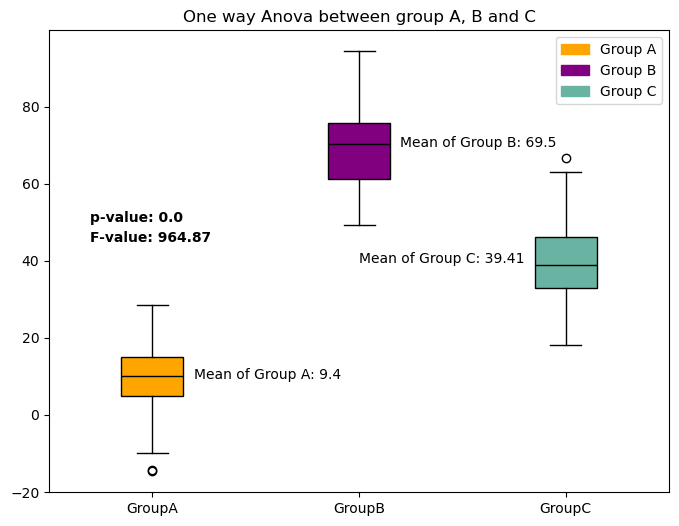

In [5]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('category')['value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=grouped.groups.keys(),
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    ) 

# Define colors for each group
colors = ['orange', 'purple', '#69b3a2']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)
    
# Add the p value and the t
p_value_text = f'p-value: {p_value}'
ax.text(0.7, 50, p_value_text, weight='bold')
f_value_text = f'F-value: {F_statistic}'
ax.text(0.7, 45, f_value_text, weight='bold')

# Add the mean for each group
ax.text(1.2, mean_groupA, f'Mean of Group A: {mean_groupA}', fontsize=10)
ax.text(2.2, mean_groupB, f'Mean of Group B: {mean_groupB}', fontsize=10)
ax.text(2, mean_groupC, f'Mean of Group C: {mean_groupC}', fontsize=10)

# Add a title and axis label
ax.set_title('One way Anova between group A, B and C')

# Add a legend
legend_labels = ['Group A', 'Group B', 'Group C']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

# Display it
plt.show()

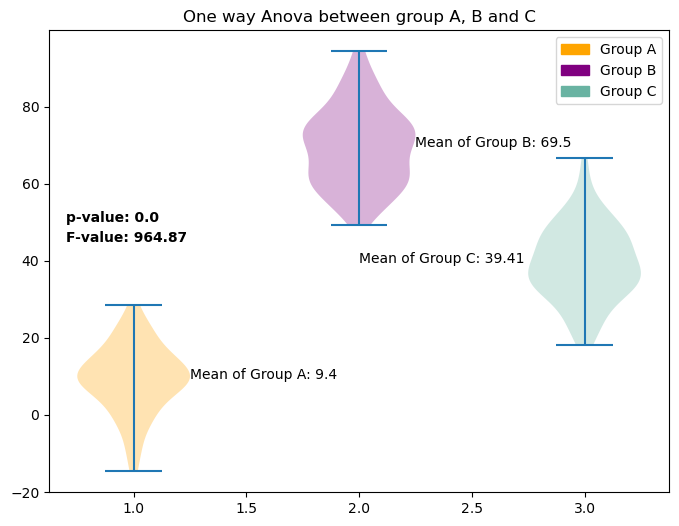

In [6]:
#now for the violin plot
# Group our dataset with our 'Group' variable
grouped = df.groupby('category')['value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
violins = ax.violinplot([group.values for name, group in grouped],
                     #labels=grouped.groups.keys()
                    ) 

# Define colors for each group
colors = ['orange', 'purple', '#69b3a2']

# Assign colors to each box in the boxplot
for violin, color in zip(violins['bodies'], colors):
    violin.set_facecolor(color)
    
# Add the p value and the t
p_value_text = f'p-value: {p_value}'
ax.text(0.7, 50, p_value_text, weight='bold')
F_value_text = f'F-value: {F_statistic}'
ax.text(0.7, 45, F_value_text, weight='bold')

# Add the mean for each group
ax.text(1.25, mean_groupA, f'Mean of Group A: {mean_groupA}', fontsize=10)
ax.text(2.25, mean_groupB, f'Mean of Group B: {mean_groupB}', fontsize=10)
ax.text(2, mean_groupC, f'Mean of Group C: {mean_groupC}', fontsize=10)

# Add a title and axis label
ax.set_title('One way Anova between group A, B and C')

# Add a legend
legend_labels = ['Group A', 'Group B', 'Group C']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

# Display it
plt.show()


I chose to make a violin chart not only because we haven't learned how to make these in class, but also because it is visually interesting to me and when reading about them I learned that they should be getting more attention than boxplots. You can see the distribution clearer than what is portrayed in the box and whisker plots that are so common all around. 

### Part 4: Pollinators

In [8]:
bee_df = pd.read_csv('bee data table - Sheet1.csv')

bee_df.head()

,Pollinator,Category of Pollinator,Visits to cucumber,Visits to eggplant,Visits to purple coneflower
0,Agapostemon virescens,sweat bee,7,3,136
1,Andrena spp.,mining bee,0,0,4
2,Anthidium manicatum,European wool carder bee,4,0,7
3,Apis mellifera,Western honey bee,72,3,13
4,Augochlora pura,sweat bee,3,0,0


The dataset represents the findings of how often different pollinators visit three different plants to see which types of plants are best suited to support various categories of pollinators. The plants were a cucumber, eggplant, and a coneflower. Each pollinator is listed in alphabetical order, includes the category of pollinator it falls in, and the number of times each pollinator visited each plant.

Data Attribute Types:

Pollinator: Ordinal \
Category of Pollinator: Categorical \
Visits to cucumber: Quantitative \
Visits to eggplant: Quantitative \
visits to purple coneflower: Quantitative 